In [10]:
# all imports
import numpy as np
import os
import requests
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.wcs import WCS
import math
import matplotlib as mpl
from astropy.visualization.wcsaxes import SphericalCircle
import pandas as pd
import random
from matplotlib.patches import Ellipse
import ligo.skymap.plot
from scipy.optimize import minimize
import numdifftools as ndt

In [39]:
# define directories
data_dir = '/global/cfs/projectdirs/desi/science/td/pv/tfgalaxies/'
cache_dir = '/pscratch/sd/j/jjpim/cache/' # my cache path
v_dir = '/pscratch/sd/j/jjpim/massmag/'

# load updated master table
tf_mastertable = Table.read(data_dir + 'tf_mastertable_massmag.fits') 

# load SGA table
SGA = Table.read('/global/cfs/cdirs/cosmo/data/sga/2020/SGA-2020.fits', 'ELLIPSE')
SGA_dict = {}
for i in range(len(SGA)):
    SGA_dict[SGA['SGA_ID'][i]] = i

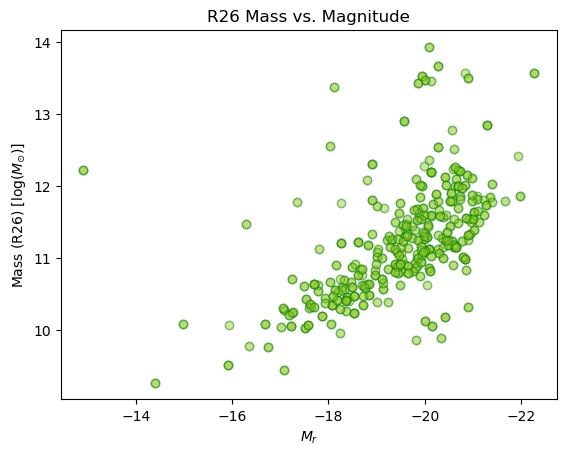

In [50]:
y = tf_mastertable['M_R26']
x = tf_mastertable['RABS_MAG26']
plt.scatter(x, y, marker='o', color='yellowgreen', alpha = 0.15, edgecolors = 'green')
plt.gca().invert_xaxis()
#plt.ylim(8, 14.5)
plt.ylabel(r"Mass (R26) [$\log(M_{\odot})$]")
plt.xlabel(r"$M_{r}$")
plt.title("R26 Mass vs. Magnitude")
# img_name = v_dir + 'Mass_Mag'
plt.savefig(v_dir + 'r26_mass_magplot.png', dpi=300)

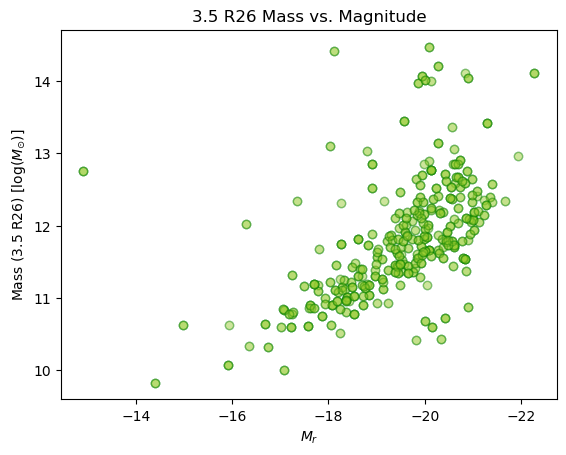

In [51]:
y = tf_mastertable['M_3P5R26']
x = tf_mastertable['RABS_MAG26']
plt.scatter(x, y, marker='o', color='yellowgreen', alpha = 0.15, edgecolors = 'green')
plt.gca().invert_xaxis()
#plt.ylim(8, 14.5)
plt.ylabel(r"Mass (3.5 R26) [$\log(M_{\odot})$]")
plt.xlabel(r"$M_{r}$")
plt.title("3.5 R26 Mass vs. Magnitude")
# img_name = v_dir + 'Mass_Mag'
plt.savefig(v_dir + '3p5r26_mass_magplot.png', dpi=300)